In [70]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import os

folder = r"C:\Develop\py\FluidicsLab\Drafts\baum\data"

T = cv2.imread(os.path.join(folder,'0_VLXT-650C_I_EF1717395191855.jpg'), cv2.IMREAD_GRAYSCALE)

S = cv2.imread(os.path.join(folder,'1_VLXT-81C_I1717395190185.jpg'), cv2.IMREAD_GRAYSCALE)

w,h = T.shape[::-1]
ws,hs = S.shape[::-1]

w,h,ws,hs

(4672, 3500, 2848, 2832)

In [77]:
def plot_(I):

    dpi = 100

    plt.rcParams["figure.dpi"] = dpi

    fig = plt.figure(frameon=True)

    ax = plt.Axes(fig, [0.,0.,1.,1.])

    ax.set_axis_off()
    ax.set_facecolor('white')

    fig.add_axes(ax)

    ax.imshow(I,cmap='gray')

    plt.show()
    plt.close()

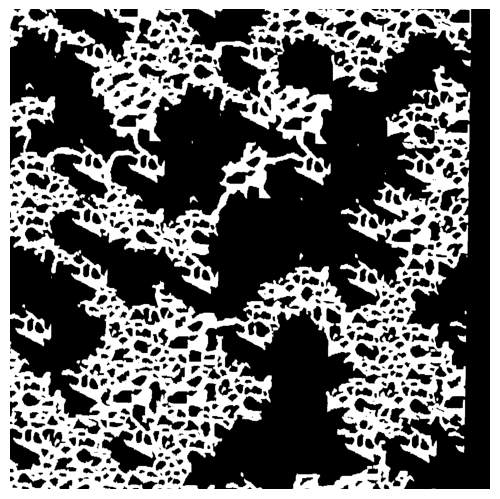

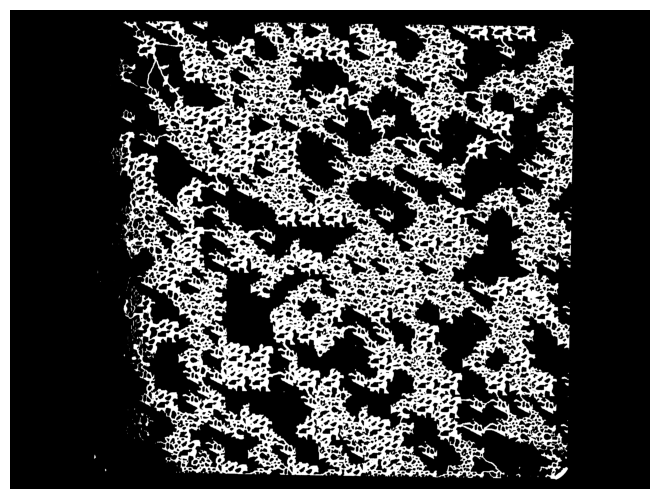

In [124]:
t = 50

D = T.copy()

D[D>t] = 255
D[D<=t] = 0

G = D[500:2000,D.shape[1]-2000:D.shape[1]-500]

#G = S.copy()

#G[G>t] = 255
#G[G<=t] = 0

#center = tuple(np.array(G.shape[1::-1]) / 2)
#G = cv2.warpAffine(G, cv2.getRotationMatrix2D(center, -90, 1), G.shape)
#G = cv2.flip(G,0)

plot_(G)
plot_(D)


0.9999999403953552 (2672, 500)
2


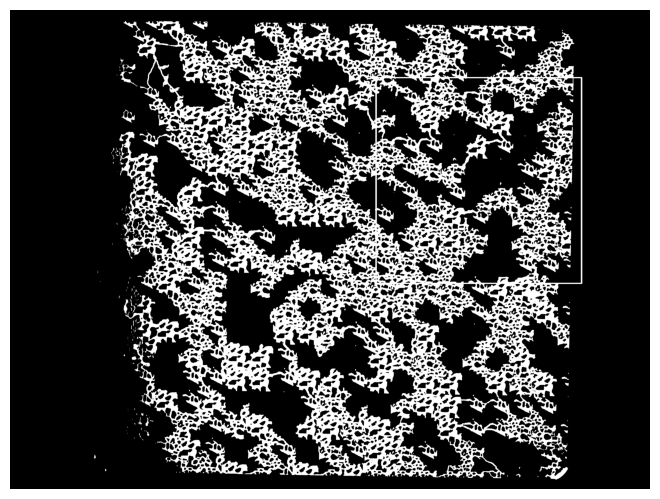

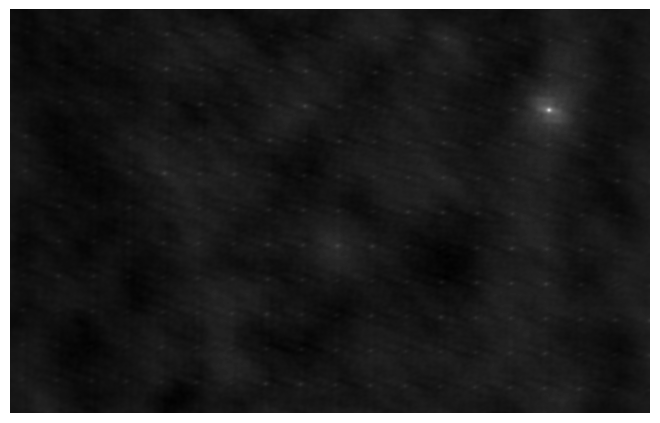

In [126]:
for method in [#cv2.TM_CCOEFF, 
               cv2.TM_CCOEFF_NORMED, 
               #cv2.TM_CCORR, 
               #cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED
               ]:
    
    L = D.copy()
    S = G.copy()    
    
    w,h = S.shape[::-1]

    R = cv2.matchTemplate(L, S, method)

    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(R)

    print(maxVal, maxLoc)

    threshold = .8
    loc = np.where(R >= threshold)
    print(len(loc))
    for pt in zip(*loc[::-1]):
        cv2.rectangle(L, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)

    #minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(R)
    #print(minVal, maxVal, minLoc, maxLoc)

    #topLeft = maxLoc
    #bottomRight = minLoc

    #bottomRight = (topLeft[0]+w, topLeft[1]+h)

    #cv2.rectangle(L, bottomRight, topLeft, 255, 10)

    plot_(L)
    plot_(R)
    #plot_(R)
